In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("/content/car data.csv")  # Change the filename accordingly
df.head()

Saving car data.csv to car data.csv


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [4]:
df.dropna(inplace=True)

In [5]:
df = pd.get_dummies(df, drop_first=True)

In [6]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 2.03651747910738
Mean Squared Error: 9.221090393053911


In [9]:
print("R-squared Score:", r2_score(y_test, y_pred))


R-squared Score: 0.5997023481244084


In [12]:
df_original = df.copy()
original_columns = df_original.columns
# Define sample_data with your actual data
sample_data = [[2014, 3.35, 5.59, 27000, 0, 7, 0, 1, 0]]  # Example data

# Get the correct number of columns from sample_data
num_sample_cols = len(sample_data[0])
# Select the corresponding columns from original_columns
selected_columns = original_columns[1: 1 + num_sample_cols]
sample_df = pd.DataFrame([sample_data[0]], columns=selected_columns)
sample_df = pd.get_dummies(sample_df, drop_first=True)

missing_cols = set(X_train.columns) - set(sample_df.columns)
for c in missing_cols:
    sample_df[c] = 0
sample_df = sample_df[X_train.columns]

predicted_price = model.predict(sample_df)

print("Predicted Car Price:", predicted_price[0])

Predicted Car Price: 6124.601015092291


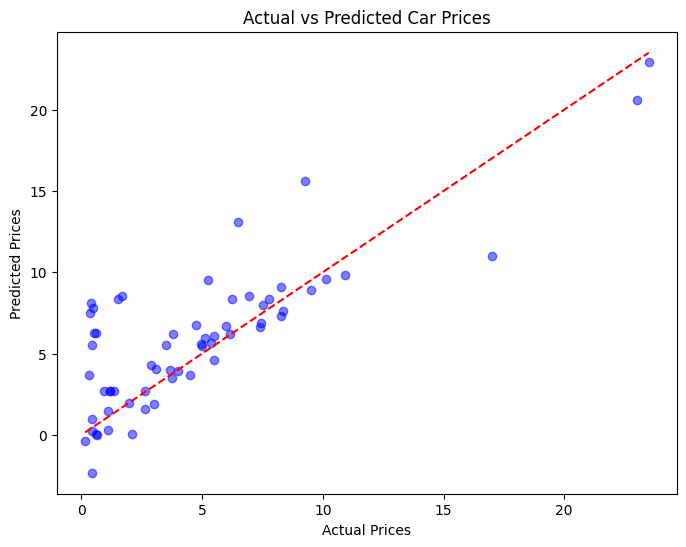

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()

In [14]:
import joblib
joblib.dump(model, "car_price_model.pkl")

['car_price_model.pkl']